In [35]:
# 폴더구조를 생성할거에요!
# 고양이, 개 이미지 각 폴더로 복사
import os

original_dataset_dir='C:/education/KDT/Kaggle/Dogs vs. Cats/train'

base_dir = 'C:/education/KDT/Kaggle/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') # cat_dog_full/train
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') # cat_dog_full/validation
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test') # cat_dog_full/test
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') # cat_dog_full/train/cats
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') # cat_dog_full/train/dogs
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') # cat_dog_full/validation/cats
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # cat_dog_full/validation/dogs
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') # cat_dog_full/test/cats
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') # cat_dog_full/test/dogs
os.mkdir(test_dogs_dir)

In [36]:
# 폴더 구성이 다 됐으면 이제 파일을 복사해야해요!
# 고양이와 개 각각 12,500개의 이미지
# train : 각각 7,000개 사용
# validation : 각각 각각 3,000개 사용
# test : 각각 2,500개 사용
import shutil

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
x_data의 shape: (20, 150, 150, 3)
t_data의 shape: (20,)
[0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]


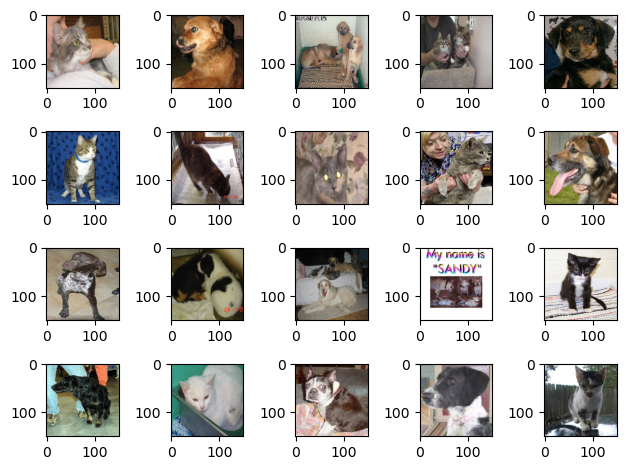

In [37]:
# ImageDataGenerator를 사용해보아요!
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

trian_dir = 'C:/education/KDT/Kaggle/cat_dog_full/train'
validation_dir = 'C:/education/KDT/Kaggle/cat_dog_full/validation'

# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# ImageDataGenerator 설정
train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory
    classes=['cats', 'dogs'], # cats, dogs 순서로 Label을 0, 1로 사용
    target_size=(150,150),    # Image에 대한 size 변경
    batch_size=20,            # 한번에 20개의 Image에 대한 pixel 정보를 가져와요! (Label에 상관없이)
    class_mode='binary'       # 이진분류면 binary, 다중분류면 categorical
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,                # target directory
    classes=['cats', 'dogs'], # cats, dogs 순서로 Label을 0, 1로 사용
    target_size=(150,150),    # Image에 대한 size 변경
    batch_size=20,            # 한번에 20개의 Image에 대한 pixel 정보를 가져와요! (Label에 상관없이)
    class_mode='binary'       # 이진분류면 binary, 다중분류면 categorical
)

for x_data, t_data in train_generator:
    print(f'x_data의 shape: {x_data.shape}') # (20, 150, 150, 3)
    print(f't_data의 shape: {t_data.shape}') # (20,)
    break

# Generator를 이용해서 20장의 이미지를 출력해보세요!
fig = plt.figure()

axes = []
for i in range(20):
    axes.append(fig.add_subplot(4, 5, i+1))

for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        axes[idx].imshow(img_data)
    print(t_data)
    break

plt.tight_layout()
plt.show()

In [38]:
# Model 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer ( Classifier )
model.add(Flatten())
model.add(Dropout(rate=0.5))

# Hidden Layer
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 35, 35, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 33, 33, 256)      

In [39]:
# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model 학습
history_full = model.fit(train_generator,
                    steps_per_epoch=700,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=300)
# 전체 데이터에 대한 학습 결과
# Epoch 30/30
# 700/700 [==============================] - 30s 43ms/step - loss: 0.0483 - accuracy: 0.9831 - val_loss: 0.2981 - val_accuracy: 0.9065

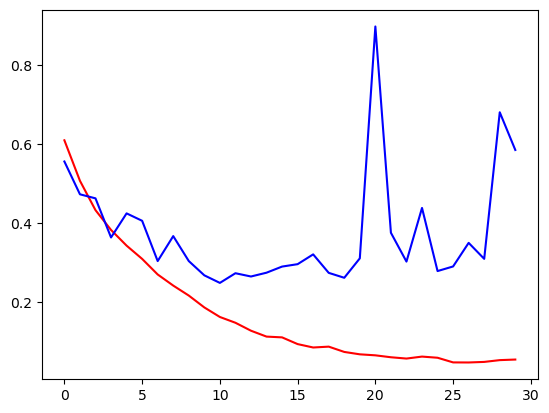

In [49]:
train_loss = history_full.history['loss']
val_loss = history_full.history['val_loss']

plt.plot(train_loss, color='r')
plt.plot(val_loss, color='b')
plt.show()

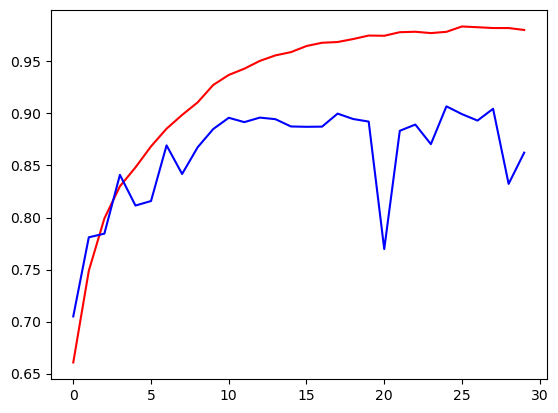

In [50]:
train_acc = history_full.history['accuracy']
val_acc = history_full.history['val_accuracy']

plt.plot(train_acc, color='r')
plt.plot(val_acc, color='b')
plt.show()

In [41]:
original_dataset_dir='C:/education/KDT/Kaggle/Dogs vs. Cats/train'

base_dir = 'C:/education/KDT/Kaggle/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [42]:
# 고양이와 개 각각 12,500개의 이미지
# train : 각각 2,000개 사용
# validation : 각각 각각 1,000개 사용
# test : 각각 1,000개 사용
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
x_data의 shape: (20, 150, 150, 3)
t_data의 shape: (20,)
[1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]


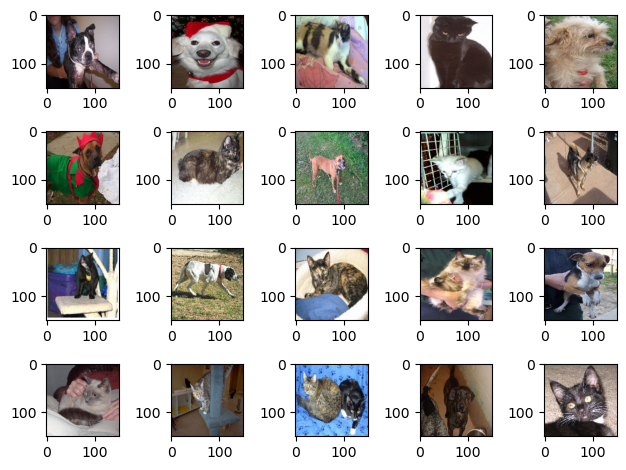

In [43]:
trian_dir = 'C:/education/KDT/Kaggle/cat_dog_small/train'
validation_dir = 'C:/education/KDT/Kaggle/cat_dog_small/validation'

# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# ImageDataGenerator 설정
train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory
    classes=['cats', 'dogs'], # cats, dogs 순서로 Label을 0, 1로 사용
    target_size=(150,150),    # Image에 대한 size 변경
    batch_size=20,            # 한번에 20개의 Image에 대한 pixel 정보를 가져와요! (Label에 상관없이)
    class_mode='binary'       # 이진분류면 binary, 다중분류면 categorical
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,                # target directory
    classes=['cats', 'dogs'], # cats, dogs 순서로 Label을 0, 1로 사용
    target_size=(150,150),    # Image에 대한 size 변경
    batch_size=20,            # 한번에 20개의 Image에 대한 pixel 정보를 가져와요! (Label에 상관없이)
    class_mode='binary'       # 이진분류면 binary, 다중분류면 categorical
)

for x_data, t_data in train_generator:
    print(f'x_data의 shape: {x_data.shape}') # (20, 150, 150, 3)
    print(f't_data의 shape: {t_data.shape}') # (20,)
    break

# Generator를 이용해서 20장의 이미지를 출력해보세요!
fig = plt.figure()

axes = []
for i in range(20):
    axes.append(fig.add_subplot(4, 5, i+1))

for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        axes[idx].imshow(img_data)
    print(t_data)
    break

plt.tight_layout()
plt.show()

In [44]:
# Model 구현
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer ( Classifier )
model.add(Flatten())
model.add(Dropout(rate=0.5))

# Hidden Layer
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 35, 35, 128)       73856     
                                                                 
 conv2d_38 (Conv2D)          (None, 33, 33, 256)      

In [45]:
# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model 학습
history_small = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)
# 일부 데이터에 대한 학습 결과
# Epoch 30/30
# 100/100 [==============================] - 5s 48ms/step - loss: 0.0495 - accuracy: 0.9885 - val_loss: 0.8369 - val_accuracy: 0.7270

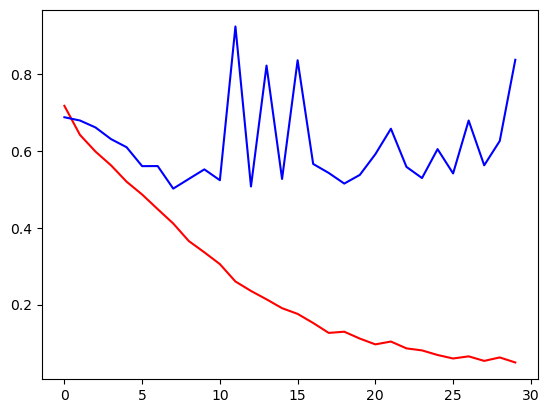

In [51]:
train_loss = history_small.history['loss']
val_loss = history_small.history['val_loss']

plt.plot(train_loss, color='r')
plt.plot(val_loss, color='b')
plt.show()

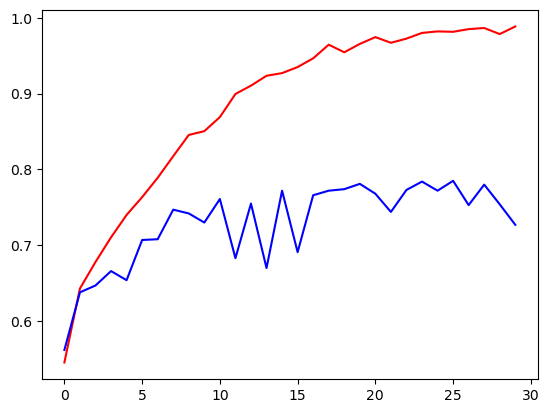

In [52]:
train_acc = history_small.history['accuracy']
val_acc = history_small.history['val_accuracy']

plt.plot(train_acc, color='r')
plt.plot(val_acc, color='b')
plt.show()

<class 'PIL.Image.Image'>
(150, 150, 3)


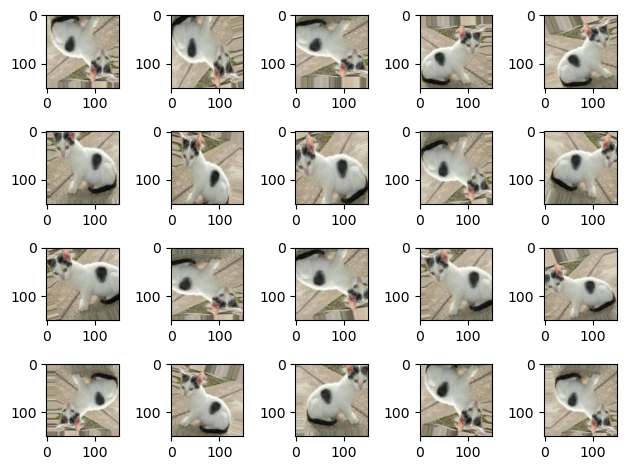

In [1]:
# 이미지 부족으로 인해
# 모델의 정확도가 많이 떨어졌어요 => overfitting 때문에 그래요!
# 그래서 이미지 부족을 해결하기 위해 증식을 사용할거에요!
# Image Augmentation은 기존 이미지에 약간의 변형을 통해 새로운 이미지를 만들어 내는 방식을 의미해요.
# 증식된 새로운 파일을 직접 만들어내는 방법도 있겠으나 이 방식은 너무 naive해요!
# ImageDataGenerator를 이용하면 편하게 증식도 할 수 있어요!
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 이미지 1장을 증식시켜보아요!
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             shear_range=0.1,
                             fill_mode='nearest')
img = image.load_img('C:/education/KDT/Kaggle/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))
print(type(img)) # <class 'PIL.Image.Image'>
x = image.img_to_array(img)
print(x.shape) # (150, 150, 3) 
x = x.reshape((1,) + x.shape) # (150, 150, 3) => (1, 150, 150, 3)

# 이미지가 준비되었으니 ImageDataGenerator를 이용해서
# 증식된 이미지 20장을 추출해서 그림을 그려보아요!
fig = plt.figure()
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break

fig.tight_layout()
plt.show()